# Enter Student Name & ID

In [10]:
student_id =   400102182            
student_name = "Parsa Norouzinezhad" 

print("your student id:", student_id)
print("your name:", student_name)

your student id: 400102182
your name: Parsa Norouzinezhad


## Part 1. Implementing Your Own PCA Function.

### 1.1 Complete the function below using only the `numpy` library.

In [2]:
import numpy as np

In [4]:
def myPCA(X, num_components):
    X_meaned = X - np.mean(X, axis=0)
    cov_matrix = np.cov(X_meaned, rowvar=False)
    eigen_values, eigen_vectors = np.linalg.eigh(cov_matrix)
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalues = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:,sorted_index]
    eigenvector_subset = sorted_eigenvectors[:,0:num_components]
    X_reduced = np.dot(eigenvector_subset.transpose(), X_meaned.transpose()).transpose()
    return X_reduced, eigenvector_subset

### 1.2 Perform your PCA function on the IRIS dataset, reduce it to 2D, and plot the results.

In [5]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

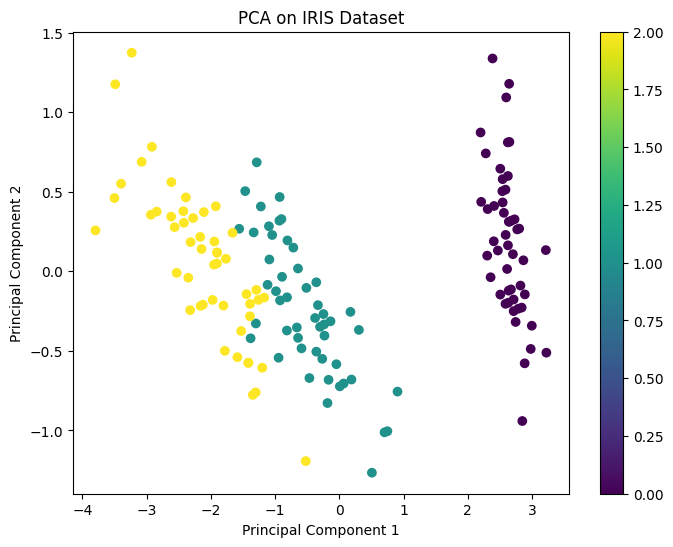

In [8]:
# myPCA on IRIS 
iris = load_iris()
X_iris = iris.data
y_iris = iris.target

# Apply PCA
X_reduced_iris,_ = myPCA(X_iris, 2)

# Plotting the results
plt.figure(figsize=(8, 6))
plt.scatter(X_reduced_iris[:, 0], X_reduced_iris[:, 1], c=y_iris, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA on IRIS Dataset')
plt.colorbar()
plt.show()


## Part 2. Faces Dataset

The dataset contains a total of 40 folders, each contains 10 images depicting a specific individual in ten different states.

### 2.1  Describe eigenfaces and how they are related to PCA.

`Answer 2.1: `

Eigenfaces are a set of eigenvectors used in the problem of human face recognition. They are derived from the covariance matrix of a set of face images. Each eigenface represents a direction in the high-dimensional space of possible images, and faces can be approximated by a linear combination of these eigenfaces.

#### How Eigenfaces Are Related to PCA

1. **Principal Component Analysis (PCA)**:
   - PCA is a dimensionality reduction technique that finds new variables, called principal components, which are orthogonal and capture the most variance in the data.
   
2. **Application to Face Recognition**:
   - In face recognition, PCA identifies the principal components of face images, which are called eigenfaces. These eigenfaces capture the most significant variations in facial features.

3. **Process**:
   - **Data Preparation**: Collect a set of face images.
   - **Mean Subtraction**: Subtract the average face from each image.
   - **Covariance Matrix**: Compute the covariance matrix of the centered images.
   - **Eigen Decomposition**: Calculate eigenvalues and eigenvectors of the covariance matrix.
   - **Selecting Principal Components**: Choose eigenfaces corresponding to the largest eigenvalues.

4. **Recognition**:
   - Project a new face onto the eigenfaces to get a set of weights. Compare these weights with those of known faces to find the closest match.

### 2.2 Read the given dataset and create train and test matrices. 
For each person, use the first five images for training and the second five images for test (`X_train`, `X_test`). Also, create labels for them (`y_train`, `y_test`).

Note: For reading the images, you can use opencv library. You can install this library using the below command in terminal:

In [9]:
import zipfile
import numpy as np
import cv2

def read_images_from_zip(zip_path):
    with zipfile.ZipFile(zip_path, 'r') as archive:
        train_images = []
        test_images = []
        train_labels = []
        test_labels = []

        for i, person_folder in enumerate(archive.namelist()):
            if person_folder.endswith('/'):
                images = [file for file in archive.namelist() if file.startswith(person_folder) and file.endswith('.bmp')]

                for img_idx, image_file in enumerate(images):
                    with archive.open(image_file) as file:
                        img = cv2.imdecode(np.frombuffer(file.read(), np.uint8), cv2.IMREAD_GRAYSCALE)
                        if img is not None:
                            if img_idx < 5:
                                train_images.append(img.flatten())
                                train_labels.append(i)
                            else:
                                test_images.append(img.flatten())
                                test_labels.append(i)
        return np.array(train_images), np.array(test_images), np.array(train_labels), np.array(test_labels)

zip_path = 'FacesDataset1.zip'  
X_train, X_test, y_train, y_test = read_images_from_zip(zip_path)


`pip install opencv-python`

### 2.3 Performing PCA.

Perform PCA on the data and reduce the dimensionality to a suitable range (e.g., between 40 and 50).

In [16]:
num_components = 50  
X_train_pca, eigvecs = myPCA(X_train, num_components)
X_train_pca = np.real(X_train_pca)
X_test_pca = np.dot(X_test, eigvecs)
X_test_pca = np.real(X_test_pca)

### 2.4 Training a Classifier
Train an LDA classifier on the PCA-transformed data and report the accuracy.

In [13]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score

lda = LDA()
lda.fit(X_train_pca, y_train)
y_pred = lda.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.265


### 2.5 Varying PCA Dimensions

Repeat the process for different dimensions of PCA (vary from 100 to 40) and discuss the results.

How many features do you think are sufficient?


In [17]:
accuracies = []
components_range = range(100, 39, -10)

for num_components in components_range:
    X_train_pca, eigvecs = myPCA(X_train, num_components)
    X_train_pca = np.real(X_train_pca)
    X_test_pca = np.dot(X_test, eigvecs)
    X_test_pca = np.real(X_test_pca)
    
    lda.fit(X_train_pca, y_train)
    y_pred = lda.predict(X_test_pca)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append((num_components, accuracy))

for num_components, accuracy in accuracies:
    print(f'PCA Components: {num_components}, Accuracy: {accuracy}')


PCA Components: 100, Accuracy: 0.355
PCA Components: 90, Accuracy: 0.32
PCA Components: 80, Accuracy: 0.3
PCA Components: 70, Accuracy: 0.315
PCA Components: 60, Accuracy: 0.24
PCA Components: 50, Accuracy: 0.265
PCA Components: 40, Accuracy: 0.27
